# Actividad Práctica: Analisis en datos epidemiológicos en supervivencia 

## Objetivo

En este ejercicio práctico trabajaremos con el dataset AIDS Clinical Trials disponible en la plataforma Kaggle. Este dataset contiene información clínica y demográfica de pacientes con VIH/SIDA que participaron en ensayos clínicos, incluyendo variables relacionadas con el tiempo de supervivencia y eventos clínicos.

Al finalizar este ejercicio, el estudiante estará en capacidad de:
* Acceder y descargar datasets desde Kaggle.
* Manipular y explorar datasets utilizando la librería Pandas.
* Aplicar técnicas de filtrado y transformación de datos.
* Calcular estadísticas descriptivas y detectar posibles outliers.
* Visualizar datos mediante gráficos.


## 1. Introducción al Dataset y Acceso vía Kaggle

### 1.1. Descripción del Dataset

El **AIDS Clinical Trials Group Study 175** Dataset, publicado inicialmente en 1996, es una colección completa de estadísticas de salud e información categórica sobre pacientes diagnosticados con SIDA. Este dataset fue creado con el propósito principal de examinar el desempeño de diferentes tipos de tratamientos para el SIDA: zidovudina (AZT) versus didanosina (ddI), AZT más ddI y AZT más zalcitabina (ddC). La tarea de predicción asociada a este dataset consiste en determinar si cada paciente falleció dentro de una ventana de tiempo específica.

El dataset fue creado para evaluar la eficacia y seguridad de varios tratamientos para el SIDA, comparando específicamente el desempeño de AZT, ddI y ddC en la prevención de la progresión de la enfermedad en pacientes infectados con VIH con conteos de CD4 entre 200 y 500 células/mm³. Este ensayo de intervención tenía como objetivo aportar información sobre la efectividad de la monoterapia frente a la terapia combinada con análogos de nucleósidos.

Se encuentra representado por 24 variables y 2139 observaciones mediante una tabla. Las variables incluyen información sobre el tiempo de supervivencia, edad, peso, diagnóstico, evento clínico, entre otras.

### 1.2. Plataforma Kaggle

El dataset se encuentra disponible en la plataforma Kaggle, y puede ser descargado manualmente desde el siguiente enlace: [AIDS Clinical Trials Dataset](https://www.kaggle.com/datasets/tanshihjen/aids-clinical-trials). 

<div style="text-align:center;">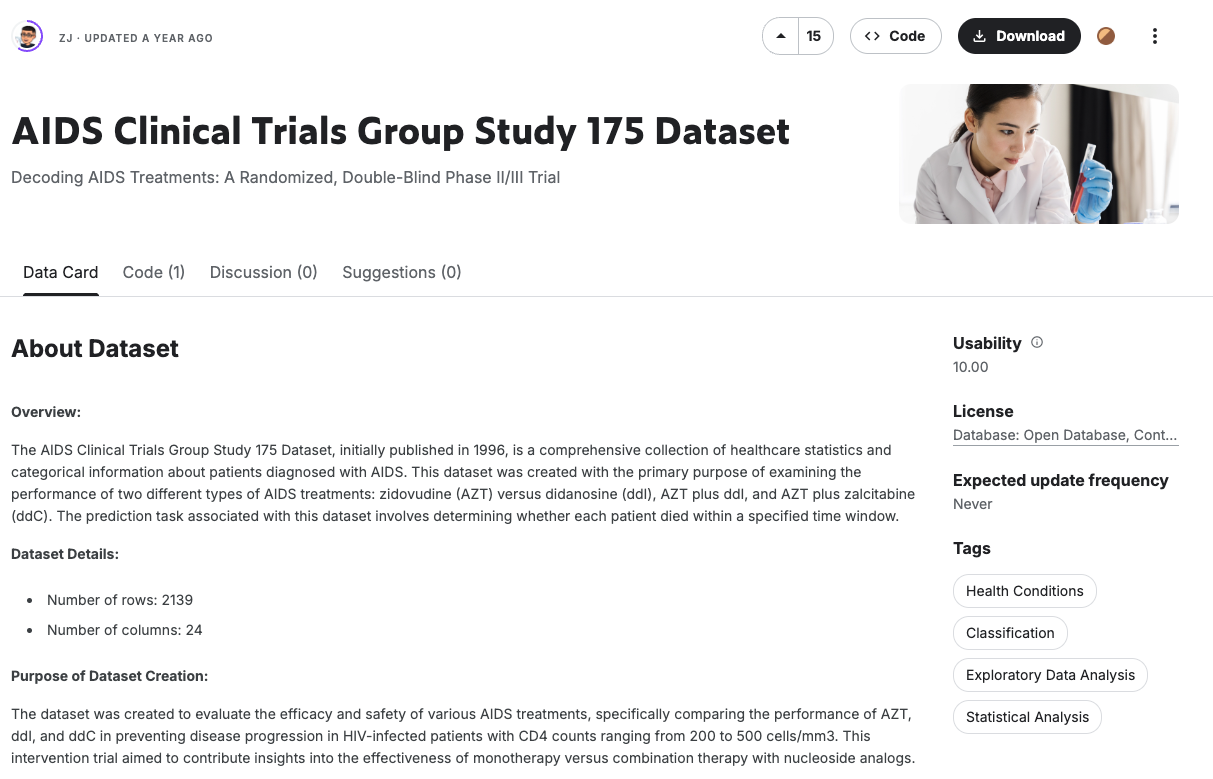</div>

En esta se incluye una descripción detallada del dataset, así como la visualización de las primeras filas del archivo CSV, lo cual permite tener una idea general de la estructura y contenido de los datos.

<div style="text-align:center;">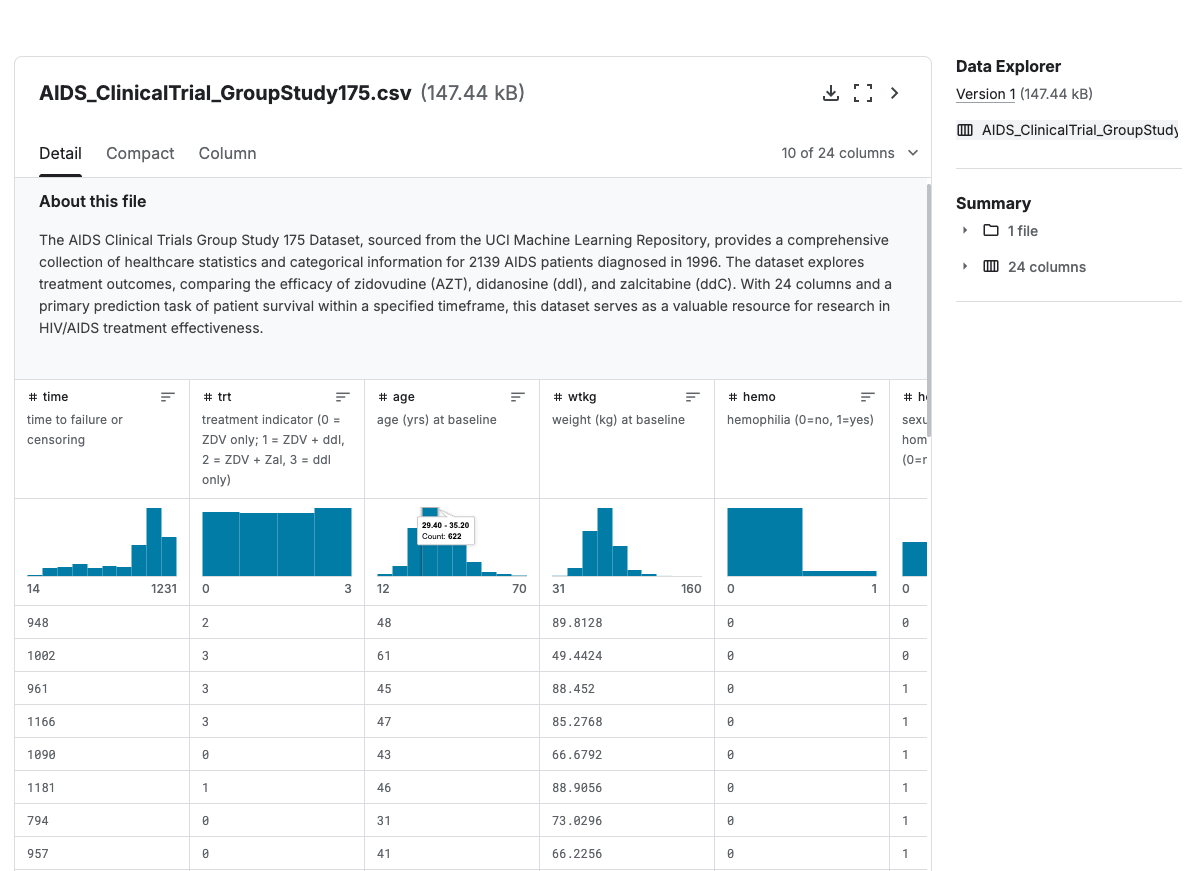</div>








### 1.3 Acceso al Dataset

Para descargar la base de datos al jupyter notebook, se puede utilizar dos opciones: 
* Opción 1: Utilizando la libreria de Python `kagglehub` para descargar el archivo directamente desde Kaggle
>```python
>import kagglehub
>
># Download latest version
>path = kagglehub.dataset_download("tanshihjen/aids-clinical-trials")
>
>print("Path to dataset files:", path)
>```
* Opción 2: Descargar manualmente el archivo y cargarlo desde el entorno local y luego indicar el `path` donde se encuentra el archivo descargado.

<div style="text-align:center;">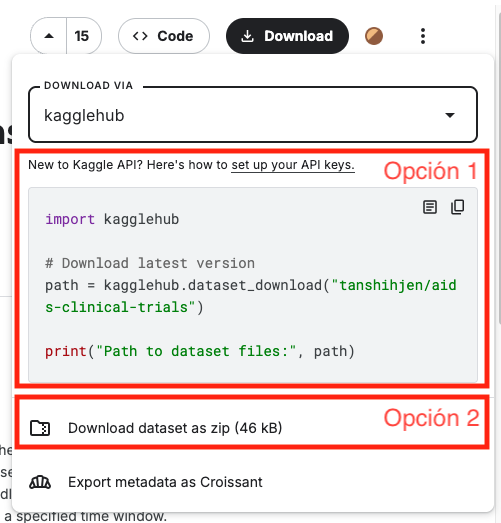</div>

Para facilitar el acceso a los datos, se utilizara la primera opción para descargar el archivo directamente desde Kaggle.









In [ ]:
# importar librerias necesarias
import kagglehub
import os

# Descargar el dataset "aids-clinical-trials" de Kaggle
folder = kagglehub.dataset_download("tanshihjen/aids-clinical-trials")
print("Ruta a la carpeta:", folder)

# Ruta al archivo descargado
path = os.path.join(folder, "AIDS_ClinicalTrial_GroupStudy175.csv")
print("Ruta al archivo:", path)

## 2. Manejo de DataFrames con Pandas

### 2.1 Pandas

[Pandas](https://pandas.pydata.org/) es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos. Es ampliamente utilizado en la comunidad de ciencia de datos para la manipulación y análisis de datos tabulares. Una de las estructuras de datos más utilizadas en Pandas es el DataFrame, que es una tabla bidimensional con etiquetas en filas y columnas.

Para cargar el dataset en un DataFrame de Pandas, utilizaremos la función `pd.read_csv()` que permite leer archivos CSV y cargarlos en un DataFrame. A continuación, se muestra un ejemplo de cómo cargar el dataset en un DataFrame y visualizar las primeras filas del mismo.

>```python
>import pandas as pd  # Comunmente se importa pandas como pd
>
># Cargar el dataset en un DataFrame
>df = pd.read_csv('AIDS Clinical Trials.csv')  # df es el nombre del DataFrame
>print(df.head())
>```

### 2.2 Exploración Inicial

Una vez cargado el dataset en un DataFrame, es importante realizar una exploración inicial para comprender la estructura y contenido de los datos. Algunas de las operaciones básicas que se pueden realizar son:

* Visualizar las primeras filas del DataFrame con `df.head()`.
* Obtener información básica del DataFrame con `df.shape`, `df.info()` y `df.describe()`.
* Revisar la cantidad de valores faltantes por columna con `df.isnull().sum()`.

#### **Ejercicio 1** 

Utilizando el codigo antes mencionado, cargue la base de datos en un DataFrame y realice una exploración inicial del mismo. Responda lo siguiente:
1. Importe las librerias necesarias 
2. Cargue el dataset en un DataFrame llamado `df`.
3. ¿Cuántas filas y columnas tiene el DataFrame?
4. ¿Qué tipo de datos contiene el DataFrame?
5. ¿Cuántos valores faltantes hay en cada columna?


In [ ]:
# <CODE> 1. Importar librerias 
import pandas as pd

In [ ]:
# <CODE> 2. Leer el archivo CSV
df = pd.read_csv(path)

In [ ]:
# <CODE> 3. Cantidad de filas y columnas
filas, columnas = df.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

In [ ]:
# <CODE> 4. Que tipo de dato de cada variable
print("Tipos de datos de las variables:")
print(df.info())

print("Se puede ver que la mayoria de las variables son de tipo entero (int64) y solo la variable wtkg es decimal (float64)")

In [ ]:
# <CODE> 5. Cantidad de valores faltantes
print("Cantidad de valores faltantes por variable:")
print(df.isnull().sum())

print("Cantidad de valores faltantes en total:", df.isnull().sum().sum())
print("Se puede ver que ninguna variable tiene valores faltantes.")

## 2.3 Descripción de Variables

Antes de continuar es necesario entender el significado de las variables en el dataset. A continuación se presenta una descripción de las variables incluidas en el dataset:


Métricas de Salud Basales:
* **age**: Edad del paciente al inicio del estudio (en años).
* **wtkg** : Peso del paciente al inicio del estudio (en kilogramos).
* **hemo**: Indicador binario de hemofilia (0 = no, 1 = sí).
* **homo**: Indicador binario de actividad homosexual (0 = no, 1 = sí).
* **drugs**: Indicador binario de historial de uso de drogas intravenosas (0 = no, 1 = sí).
* **karnof**: Puntaje de Karnofsky (escala de 0-100) que indica el estado funcional del paciente.

Historial de Terapia Antirretroviral:
* **oprior**: Indicador binario del uso previo de antirretrovirales diferentes a AZT antes del estudio (0 = no, 1 = sí).
* **z30**: Indicador binario de uso de AZT en los 30 días previos al estudio (0 = no, 1 = sí).
* **zprior**: Indicador binario de uso de AZT previo al estudio (0 = no, 1 = sí).
* **preanti**: Número de días de terapia antirretroviral antes de ingresar al estudio.

Información Demográfica:
* **race**: Raza del paciente (0 = Blanco, 1 = No blanco).
* **gender**: Género del paciente (0 = Femenino, 1 = Masculino).

Historial de Tratamiento:
* **time**: Tiempo (diás) hasta el fallo o censura
* **label**: variable binaria que señala si el paciente falleció (1 = fallecido) o si fue censurado (0 = censurado).
* **trt**:  Indicador del tipo de tratamiento recibido (0 = solo ZDV, 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = solo ddI).
* **str2**: Indicador binario del historial de tratamiento antirretroviral (0 = naive, 1 = con experiencia).
* **strat**: Variable categórica que representa la estratificación según historial previo de tratamiento antirretroviral.

Información Sintomática:
* **symptom**: Indicador binario del estado sintomático del paciente (0 = asintomático, 1 = sintomático).

Atributos Adicionales de Tratamiento:
* **treat**: Indicador binario del tipo de tratamiento recibido (0 = solo AZT, 1 = otros tratamientos).
* **offtrt** : Indicador binario que señala si el paciente dejó el tratamiento antes de las 96±5 semanas (0 = no, 1 = sí).

Métricas Inmunológicas:
* **cd40**: Conteo de células CD4 al inicio del estudio.
* **cd420**: Conteo de células CD4 a las 20±5 semanas.
* **cd80**: Conteo de células CD8 al inicio del estudio.
* **cd820**: Conteo de células CD8 a las 20±5 semanas.


Para entender mejor la distribución de los datos y la relación entre las variables, es útil realizar un análisis exploratorio de los datos, como la descripción de las estadísticas básicas.

#### **Ejercicio 2** 
En base a lo anterior, calcule las estadisticas descriptivas (promedio, desviación estandar, minimo, maximo, etc) para cada una de las variables. HINT: Utilice la función `df.describe()` para obtener las estadisticas descriptivas de las variables numericas.

Responda a las siguientes preguntas:
1. ¿Cuál es el promedio de edad de los pacientes?
2. ¿Cuál es el tiempo promedio hasta el fallo o censura?
3. ¿ Como se comportan las variables  `trt` o `race` en relación a la variable `time`o `age`? 

In [ ]:
# <CODE> Descripción
print(df.describe())

El uso de variables codificadas en formato categórico, ya sea binario o numérico, limita la aplicabilidad de descriptores estadísticos clásicos como la media, desviación estándar o percentiles, ya que estos asumen una naturaleza **continua u ordinal** en los datos. En el caso de variables binarias (0/1), la media puede interpretarse como una proporción, pero para variables categóricas sin orden (por ejemplo, tipo de tratamiento codificado como 0, 1, 2, 3), calcular medidas de tendencia central o dispersión no tiene un significado válido y puede inducir a interpretaciones incorrectas. 

Además, métricas diseñadas para detectar valores atípicos, como el rango intercuartílico, no son adecuadas para este tipo de variables, ya que los números representan categorías discretas y no cantidades susceptibles a extremos. Por lo tanto, el análisis descriptivo debe centrarse en frecuencias y distribuciones de categorías en lugar de aplicar estadísticas resumidas que podrían ser inapropiadas.

## 3. Manipulación de Datos

### 3.1 Filtrado de Datos

Para obtener caracteristicas especificas de los datos, es necesario filtrar el DataFrame utilizando condiciones lógicas. Por ejemplo, se puede filtrar de acuerdo a una condición específica en una columna, o combinar múltiples condiciones utilizando operadores lógicos como `&` (AND) y `|` (OR). La sintaxis para filtrar un DataFrame en Pandas es la siguiente:

>```python
># Filtrar el DataFrame por una condición específica
>df_filtrado = df[df['columna'] > valor]
>
># Filtrar el DataFrame por múltiples condiciones
>df_filtrado = df[(df['columna1'] > valor1) & (df['columna2'] < valor2)]
>```


#### **Ejercicio 3** 
Filtre el DataFrame para obtener las siguientes submuestras:
1. Pacientes con edad mayor a 50 años.
2. Pacientes con un conteo de células CD4 al inicio del estudio mayor a 300 pero menor a 400.
3. Pacientes que recibieron tratamiento con ZDV + ddI y que presentaron síntomas.



In [ ]:
# <CODE> 1. Pacientes con edad mayor a 50 años
df_50 = df[df["age"] > 50]
print("Pacientes con edad mayor a 50 años:", df_50.shape[0])

In [ ]:
# <CODE> 2. Pacientes con un conteo de CD4 entre 300 y 400
df_cd4 = df[(df["cd40"] >= 300) & (df["cd40"] <= 400)]
print("Pacientes con un conteo de CD4 entre 300 y 400:", df_cd4.shape[0])

In [ ]:
# <CODE> 3. Pacientes que recibieron tratamiento con ZVD + ddI  y que presentaron sintomas
df_tratamiento = df[(df["trt"] == 1 ) & (df["symptom"] == 1)]
print("Pacientes que recibieron tratamiento con ZVD + ddI y que presentaron sintomas:", df_tratamiento.shape[0])

Es importante notar el comportamiento de la columna `index`. Por ejemplo si se filtra el DataFrame para obtener los pacientes con edad mayor a 50 años, el índice de las filas no se reinicia, sino que se mantiene el índice original del DataFrame. Para reiniciar el índice y obtener un nuevo DataFrame con un índice secuencial, se puede utilizar la función `reset_index()`.
>```python
># Reiniciar el índice del DataFrame
>df_filtrado = df_filtrado.reset_index(drop=True)
>```


#### **Ejercicio 4** 
Filtre el dataframe para obtener los pacientes con edad mayor a 50 años y reinicie el índice del DataFrame resultante. Compare el índice original con el índice reiniciado.

In [ ]:
# <CODE> 
df_50 = df[df['age'] > 50]
df_50_reset = df_50.reset_index(drop=True)
print(df_50.head())
print(df_50_reset.head())


### 3.2 Ordenamiento de Datos

Otra operación común en la manipulación de datos es el ordenamiento de filas en un DataFrame. Para ordenar un DataFrame en Pandas, se puede utilizar la función `sort_values()` y especificar la columna por la cual se desea ordenar. La sintaxis para ordenar un DataFrame en Pandas es la siguiente:

>```python
># Ordenar el DataFrame por una columna específica
>df_ordenado = df.sort_values(by='columna')
>```

#### **Ejercicio 5** 

Ordene el DataFrame por la columna `age` en orden descendente y reinicie el índice del DataFrame resultante. Compare el índice original con el índice reiniciado.


In [ ]:
# <CODE>
df_age_sort = df.sort_values(by='age', ascending=False)
print(df_age_sort.head())

df_age_sort_reset = df_age_sort.reset_index(drop=True)
print(df_age_sort_reset.head())



### 3.3 Creación de nuevas columnas

En ocasiones, es necesario crear nuevas columnas en un DataFrame a partir de operaciones o transformaciones de columnas existentes. Para crear una nueva columna en un DataFrame de Pandas, se puede utilizar la siguiente sintaxis:

>```python
># Crear una nueva columna en el DataFrame
>df['nueva_columna'] = df['columna1'] + df['columna2']
>```

Es importante recalcar que la operación se realiza elemento a elemento, es decir, se suma el primer elemento de `columna1` con el primer elemento de `columna2`, el segundo elemento de `columna1` con el segundo elemento de `columna2`, y así sucesivamente. Por lo tanto, es importante asegurarse de que las columnas tengan la misma longitud y que los datos sean compatibles para la operación. 

> Es posible realizar operaciones matemáticas entre columnas, como suma, resta, multiplicación y división, así como aplicar funciones matemáticas y estadísticas a las columnas existentes para crear nuevas columnas con información adicional!

#### **Ejercicio 6** 

Genere una nueva columna llamada `age_group`, que clasifique los rangos de edad de los pacientes en las siguientes categorías:
* Menor de 30  (label 0)
* Entre 30 y 50 años (label 1)
* Mayor de 50 años (label 2)

HINT: Cree 3 nuevas columnas con valores binarios que indiquen si la edad del paciente cumple con cada uno de los rangos especificados. Luego, combine estas columnas para obtener la clasificación final de los rangos de edad.

In [ ]:
# <CODE> 

# Opción 1: Usando operadores lógicos
menor_30 = df['age'] < 30
entre_30_50 = (df['age'] >= 30) & (df['age'] <= 50)
mayor_50 = df['age'] > 50

df['age_group'] = -1
df['age_group'] = menor_30 * 0 + entre_30_50 * 1 + mayor_50 * 2

print(df['age_group'].value_counts())

# Opción 2: Usando loc
df['age_group'] = -1

# Asignar valores según rangos de edad
df.loc[df['age'] < 30, 'age_group'] = 0
df.loc[(df['age'] >= 30) & (df['age'] <= 50), 'age_group'] = 1
df.loc[df['age'] > 50, 'age_group'] = 2

# Mostrar distribución de grupos
print(df['age_group'].value_counts())


#### **Ejercicio 7** 
Cree una nueva columna llamada `time_group` que categorize el tiempo hasta el fallo o censura en las siguientes categorias:
* corto: < 12 meses
* medio: 12-24 meses
* largo: > 24 meses

Considere que la variable `time` esta en dias y que la variable a crear es de tipo `string`!

In [ ]:
# <CODE> Categorización de la variable "time" 
df['time_group'] = ''

# Asignar valores según rangos de tiempo
df.loc[df['time'] / 365 < 1, 'time_group'] = 'corto'
df.loc[(df['time'] / 365 >= 1) & (df['time'] / 365 < 3), 'time_group'] = 'medio'
df.loc[df['time'] / 365 >= 3, 'time_group'] = 'largo'

print(df['time_group'].value_counts())


#### **Ejercicio 8** 

Con respecto a la columna `time_group` generada en el ejercicio anterior, realice un conteo de cuantos pacientes se encuentran en cada categoria. HINT: Utilice la función `value_counts()` para obtener el conteo de valores únicos en una columna. Calcule el porcentaje de pacientes en cada categoria.




In [ ]:
# <CODE>
print(df.value_counts('time_group'))

# Mediante normalize=True se obtiene la proporción de cada categoría
print(df.value_counts('time_group', normalize=True))

## 4. Visualización de Datos

### 4.1 Histogramas

Los histogramas son una forma efectiva de visualizar la distribución de una variable numérica. En Pandas, se puede utilizar la función `hist()` para generar un histograma de una columna específica en un DataFrame. La sintaxis para generar un histograma en Pandas es la siguiente:

>```python
># Generar un histograma de una columna específica
>ax = df['columna'].hist()
>ax.set_xlabel('Etiqueta del Eje X')
>ax.set_ylabel('Etiqueta del Eje Y')
>ax.set_title('Título del Histograma')
>```

#### **Ejercicio 9** 

Genere un histograma de la variables `time` y  `time_group`. Responda:
1. ¿Cómo se distribuye el tiempo hasta el fallo o censura en los pacientes?
2. ¿Que sucede cuando la variable no es una variable continua sino categorica?
 

In [ ]:
# <CODE> histograna de time
ax = df['time'].hist()
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de tiempo de fallo o censura')
ax.set_xlabel('Tiempo')



In [ ]:
# <CODE> histograna de time_group
ax =df['time_group'].hist()
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma categorico de tiempo de fallo o censura')
ax.set_xlabel('Tiempo')


#### **Ejercicio 10** 

Resulta deseable comparar y visualizar el comportamiento de una variable frente a alguna condición en particular. Para ello,  se le pide realizar un histograma de la variable `time` para cada uno de los tratamiento (`trt`) recibidos por los pacientes. HINT: Utilice la función `groupby()` para agrupar los datos por una columna específica y luego genere un histograma para cada grupo.






In [ ]:
# <CODE>

# Agrupar por tratamiento
trt_0 = df[df['trt'] == 0]
trt_1 = df[df['trt'] == 1]
trt_2 = df[df['trt'] == 2]
trt_3 = df[df['trt'] == 3]


# Crear figur
trt_0['time'].hist(alpha=0.5)
trt_1['time'].hist(alpha=0.5)
trt_2['time'].hist(alpha=0.5)
trt_3['time'].hist(alpha=0.5)




### 4.2 Gráficos de Barras

Los gráficos de barras son una forma efectiva de visualizar la distribución de una variable categórica. En Pandas, se puede utilizar la función `bar()` para generar un gráfico de barras de una columna específica en un DataFrame. La sintaxis para generar un gráfico de barras en Pandas es la siguiente:

>```python
># Generar un gráfico de barras de una columna específica
>ax = df['columna'].value_counts().plot(kind='bar')  # Contar los valores únicos y generar un gráfico de barras
>ax.set_xlabel('Etiqueta del Eje X')
>ax.set_ylabel('Etiqueta del Eje Y')
>ax.set_title('Título del Gráfico de Barras')
>```

En caso de querer relacionar dos o más variables es posible utilizar la función `groupby()` para agrupar los datos por una columna específica y luego generar un gráfico de barras para cada grupo.

#### `Groupby`

En pandas, groupby es una función poderosa que permite agrupar los datos de un DataFrame según los valores de una o más columnas. Una vez agrupados, se pueden aplicar diferentes operaciones, como calcular la media, la suma, el conteo, entre otras.

>```python
># Agrupar los datos por una columna específica
>grupo = df[['columna1', 'columna2']].groupby('columna1')
>
># Calcular la media de las columnas agrupadas
>media = grupo.mean()
>```

En el ejemplo anterior, se agrupan las columnas `columna1` y `columna2` por los valores únicos de `columna1`, y luego se calcula la media de las columnas agrupadas.


#### **Ejercicio 11** 

Para evaluar el impacto de los sintomas en la supervivencia de los pacientes, relacione la variable `symptom` con la variable `time` y calcule el tiempo promedio hasta el fallo o censura para pacientes con y sin sintomas. Genere un gráfico de barras para visualizar la distribución de pacientes con y sin sintomas. Responda:
1. ¿Cuál es el tiempo promedio hasta el fallo o censura para pacientes con sintomas?
2. ¿Cuál es el tiempo promedio hasta el fallo o censura para pacientes sin sintomas?
3. ¿Se puede inferir alguna información de la distribución de pacientes con y sin sintomas?



In [ ]:
# <CODE>
#Para evaluar el impacto de los sintomas en la supervivencia de los pacientes, relacione la variable `symptom` con la variable `time` y calcule el tiempo promedio hasta el fallo o censura para pacientes con y sin sintomas. Genere un gráfico de barras para visualizar la distribución de pacientes con y sin sintomas. Responda:
#1. ¿Cuál es el tiempo promedio hasta el fallo o censura para pacientes con sintomas?
#2. ¿Cuál es el tiempo promedio hasta el fallo o censura para pacientes sin sintomas?
#3. ¿Se puede inferir alguna información de la distribución de pacientes con y sin sintomas?

# Agrupar por sintomas
# Crear gráfico de barras con groupy
ax = df[['time', 'symptom']].groupby('symptom').mean().plot(kind='bar')
ax.set_ylabel('Frecuencia')
ax.set_title('Tiempo promedio hasta el fallo o censura por sintomas')
ax.set_xlabel('Sintomas')
ax.set_xticklabels(['Sin sintomas', 'Con sintomas'], rotation=0)





### 4.3 Gráficos de Caja (Boxplots)

Los gráficos de caja son una forma efectiva de visualizar la distribución de una variable numérica y detectar posibles valores atípicos. Además, genera una representación gráfica de los cuartiles y la mediana de la variable. 

![](/Users/carlos/Documents/github/Diplomado_iHealth/img/boxplot.png)

En Pandas, se puede utilizar la función `boxplot()` para generar un gráfico de caja de una columna específica en un DataFrame. La sintaxis para generar un gráfico de caja en Pandas es la siguiente:

>```python
># Generar un gráfico de caja de una columna específica
>ax = df.boxplot(column='columna')
>ax.set_ylabel('Etiqueta del Eje Y')
>ax.set_title('Título del Gráfico de Caja')
>```



este va a ser el ejercicio grande, comparación de los diferente stratamientos y su tiempo de supervivencia

trt vs cdt vs time

#### **Ejercicio 12** 
Para evaluar la efectividad del tratamiento, debera las metricas inmunologicas antes y despues del tratamiento. Para ello debera generar un gráfico de caja para cada una de las variables `cd40`, `cd420`, `cd80` y `cd820` en función del tipo de tratamiento recibido (`trt`). Reemplaze los valores de la variable `trt` por los nombres de los tratamientos correspondientes. HINT: Puede usar el metodo replace. Responda:
1. ¿Cuál es la mediana de los conteos de células CD4 y CD8 al inicio del estudio para cada tipo de tratamiento?
2. ¿Cuál es la mediana de los conteos de células CD4 y CD8 a las 20±5 semanas para cada tipo de tratamiento?
3. ¿Se observa alguna diferencia aparente en los conteos de células CD4 y CD8 entre los diferentes tratamientos?


In [ ]:
# <CODE>

# reemplazar nombres
df['trt'] = df['trt'].replace({0: 'Control', 1: 'ZVD + ddI', 2: 'ddC + ddI', 3: 'ddC + ddI + ZVD'})

cd40_vs_cd420 = df[['cd40', 'cd420', 'trt']].groupby('trt')
# Crear gráfico de barras con groupy
ax = cd40_vs_cd420.boxplot(figsize=(20, 5), subplots=(1, 2), sharey=True)



In [ ]:
# <CODE>
cd80_vs_cd820 = df[['cd80', 'cd820', 'trt']].groupby('trt')
# Crear gráfico de barras con groupy
ax = cd80_vs_cd820.boxplot(figsize=(20, 5), subplots=(1, 2), sharey=True)



### 4.3 Detección de Valores Atípicos

Los gráficos de caja también son útiles para detectar valores atípicos en los datos. Los valores atípicos son aquellos que se encuentran por encima o por debajo de un rango específico, generalmente definido como 1.5 veces el rango intercuartílico (IQR). La detección de valores atípicos mediante el rango intercuartil (IQR) se basa en los siguientes cálculos:
1. Calcular los cuartiles:
	* Primer cuartil (Q1)= $P_{25}$
	* Tercer cuartil (Q3): $P_{75}$

Donde $P_{25}$ y $P_{75}$ son los percentiles 25 y 75, respectivamente.

2.	Calcular el rango intercuartil (IQR):
	* IQR = Q3 - Q1

3.	Definir los límites para detectar valores atípicos:
	* Límite inferior:
		$L_{\text{inf}} = Q1 - 1.5 \times IQR$
	* Límite superior:
		$L_{\text{sup}} = Q3 + 1.5 \times IQR$

4.	Identificar los valores atípicos:
	Un dato x se considera atípico si:
	$x < L_{\text{inf}} \quad \text{o} \quad x > L_{\text{sup}}$

Esto significa que cualquier valor fuera de este rango es considerado un valor atípico.


#### **Ejercicio 13** 
A modo de verificación , calcule el rango intercuartil (IQR) y los límites inferior y superior para detectar valores atípicos en la variable `cd40`. Luego, indetifique sus valores atípicos. HINT: Utilice la función `quantile()` para calcular los cuartiles y la función `loc[]` para filtrar los valores atípicos.



In [ ]:
# <CODE>
# A modo de verificación , calcule el rango intercuartil (IQR) y los límites inferior y superior para detectar valores atípicos en la variable `cd40` en el grupo control. Luego, indetifique sus valores atípicos. HINT: Utilice la función `quantile()` para calcular los cuartiles y la función `loc[]` para filtrar los valores atípicos.

# Calcular cuartiles
q1 = df['cd40'].quantile(0.25)
q3 = df['cd40'].quantile(0.75)
iqr = q3 - q1

# Calcular límites inferior y superior
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

# Filtrar valores atípicos
outliers = df[(df['cd40'] < lower_bound) | (df['cd40'] > upper_bound)]
print("Valores atípicos en la variable cd40:")
print(outliers[['cd40', 'trt']])
